In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('C:/Users/teeyob/Telco_Investment_Analysis/src')
sys.path.append(os.path.abspath('../scripts'))


In [2]:
from data_preparation import load_data, clean_data

In [3]:
load_data = load_data('xdr_data')
clean_data = clean_data(load_data)
df = clean_data
nan_summary = df.isna().sum()
print(nan_summary)

Connection successful


c:\Users\teeyob\Telco_Investment_Analysis\scripts\data_preparation.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

Aggregate and Report Top 10 Customers

In [4]:
from user_engagement_analysis import aggregate_and_report_top_customers

# Example usage
try:
    top_sessions, top_duration, top_traffic = aggregate_and_report_top_customers(df)
    print("Top 10 Customers by Total Sessions:")
    print(top_sessions)
    print("\nTop 10 Customers by Total Duration:")
    print(top_duration)
    print("\nTop 10 Customers by Total Traffic:")
    print(top_traffic)
except ValueError as e:
    print(e)

Top 10 Customers by Total Sessions:
       MSISDN/Number  Dur. (ms)  Activity Duration DL (ms)  Total DL (Bytes)  \
37196   3.367608e+10          7                    13012.0      2.964690e+09   
43516   3.369966e+10          7                    11757.0      3.436153e+09   
3067    3.361471e+10          6                    12935.0      3.166450e+09   
5068    3.362055e+10          6                   117719.0      2.696631e+09   
19999   3.366020e+10          6                    98389.0      1.570234e+09   
22978   3.366173e+10          6                    95878.0      2.178067e+09   
27221   3.366383e+10          6                    71779.0      1.995698e+09   
9973    3.363728e+10          5                    49322.0      1.780472e+09   
17601   3.365895e+10          5                    35286.0      2.224743e+09   
26961   3.366371e+10          5                    14466.0      2.185251e+09   

       Total UL (Bytes)  Total Traffic (Bytes)  
37196       332044622.0           

Normalize Metrics and Apply K-means Clustering

c:\Users\teeyob\Telco_Investment_Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Summary:
  Cluster Dur. (ms)                                         \
                min       max           mean           sum   
0       0   26866.0  244899.0  154916.389440  2.358912e+09   
1       1    7426.0  244534.0   91886.664073  1.641188e+09   
2       2    7697.0  244755.0   91277.114420  1.587492e+09   

  Activity Duration DL (ms)                                      \
                        min      max          mean          sum   
0                       0.0  66902.0  36605.252972  557388187.0   
1                       0.0  49602.0  14494.089525  258878933.0   
2                       0.0  47531.0  14222.653864  247360396.0   

  Total Traffic (Bytes)                                           
                    min          max          mean           sum  
0            33999624.0  945461738.0  4.922735e+08  7.495849e+12  
1           492118799.0  950760661.0  7.163748e+08  1.279517e+13  
2            28956107.0  499135622.0  2.724567e+08  4.738567e+12  


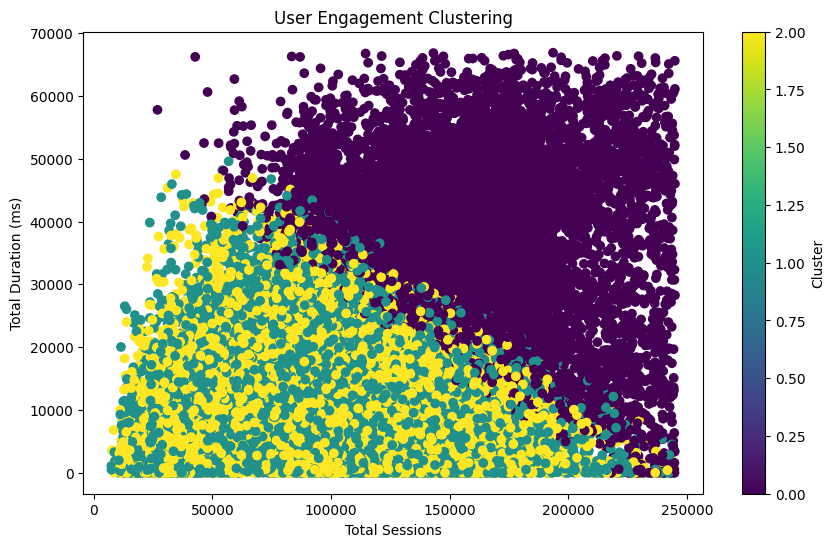

In [5]:
from user_engagement_analysis import cluster_and_analyze_engagement
try:
    df_clustered, cluster_summary = cluster_and_analyze_engagement(df)
    print("\nCluster Summary:")
    print(cluster_summary)
    
    # Visualizing clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Dur. (ms)'], df['Activity Duration DL (ms)'], c=df['Cluster'], cmap='viridis')
    plt.xlabel('Total Sessions')
    plt.ylabel('Total Duration (ms)')
    plt.title('User Engagement Clustering')
    plt.colorbar(label='Cluster')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")

Aggregate User Total Traffic Per Application

In [7]:
from user_engagement_analysis import aggregate_user_traffic
try:
    top_traffic_per_app = aggregate_user_traffic(df)
    print("\nTop 10 Users Per Application:")
    print(top_traffic_per_app)
except KeyError as e:
    print(f"KeyError: {e}")



Top 10 Users Per Application:
      Social Media DL (Bytes)                       Google DL (Bytes)  \
                MSISDN/Number Total Traffic (Bytes)     MSISDN/Number   
37196            3.367608e+10            15563170.0      3.367608e+10   
43516            3.369966e+10            13766847.0      3.369966e+10   
19999            3.366020e+10            12939391.0      3.366020e+10   
32068            3.366720e+10            11269212.0               NaN   
39941            3.368613e+10            10590680.0               NaN   
21907            3.366117e+10            10496978.0               NaN   
38490            3.368091e+10            10107273.0               NaN   
10056            3.363761e+10            10044224.0               NaN   
25111            3.366276e+10             9931105.0               NaN   
8978             3.363274e+10             9868778.0               NaN   
42619                     NaN                   NaN      3.369896e+10   
5068                

Plot the Top 3 Most Used Applications

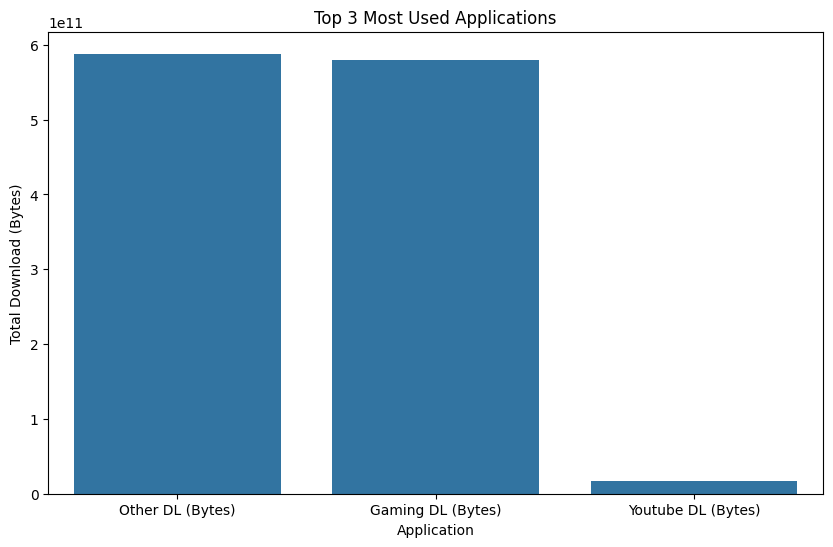

In [7]:
from user_engagement_analysis import plot_top_applications
plot_top_applications(df)